Dimensione di ciascuna immagine: 128x128


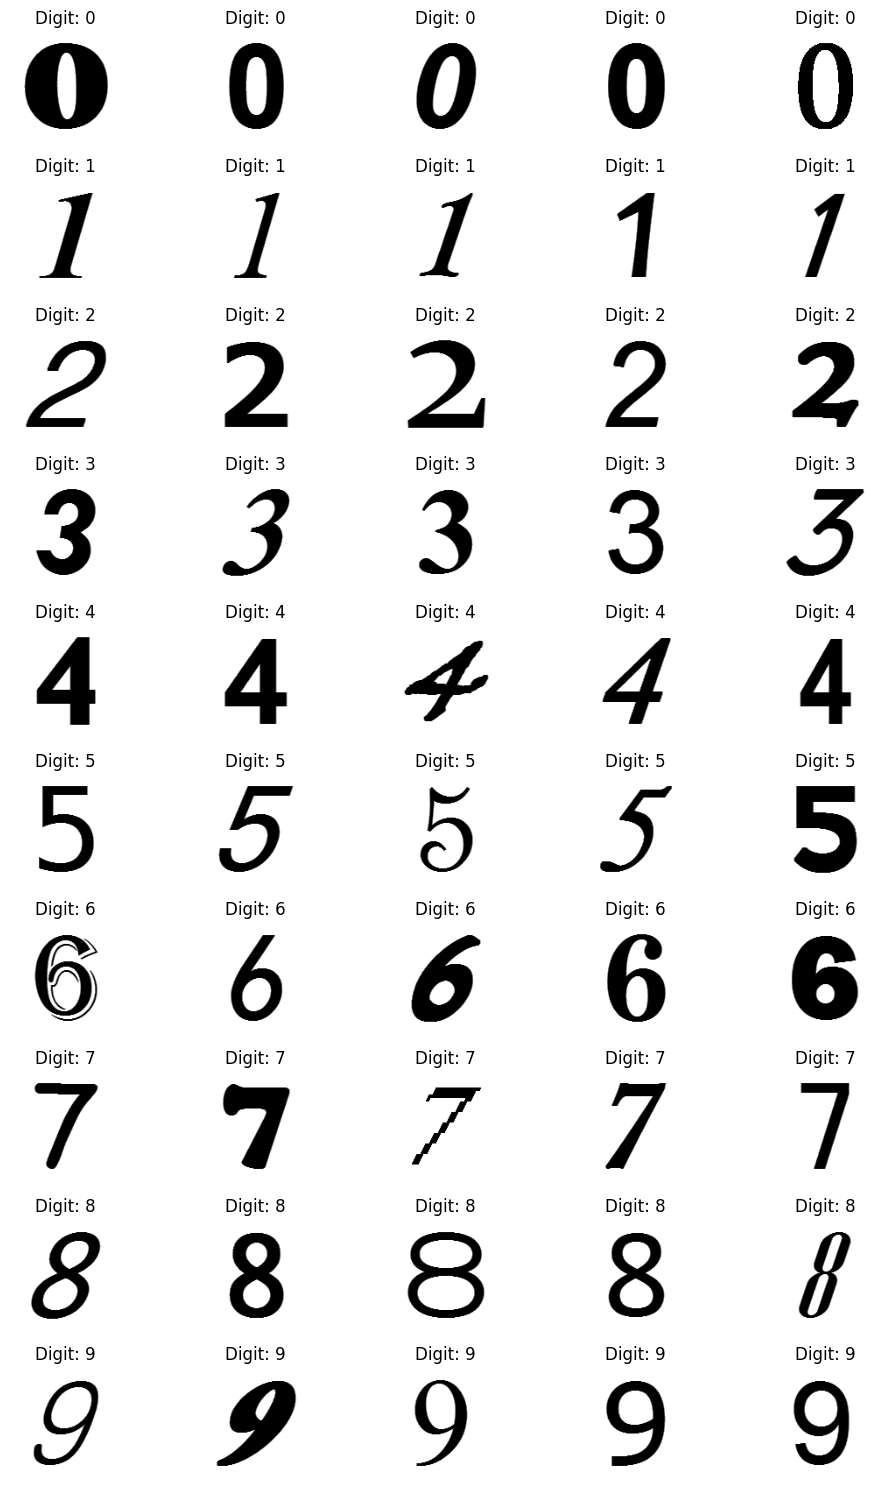

In [1]:
import kagglehub
import os
import matplotlib.pyplot as plt
from PIL import Image
import random

def load_dataset():
    path = kagglehub.dataset_download("karnikakapoor/digits")
    dataset_path = os.path.join(path, "digits updated/digits updated")
    return dataset_path

def visualize_digits():
    dataset_path = load_dataset()

    # Escludi .DS_Store e altri file non cartella
    digit_folders = sorted([f for f in os.listdir(dataset_path) if f != ".DS_Store" and os.path.isdir(os.path.join(dataset_path, f))])
    num_images = 5

    fig, axes = plt.subplots(len(digit_folders), num_images, figsize=(10, 15))

    # Carica un'immagine per ottenere la dimensione e stamparla una sola volta
    first_valid_folder = digit_folders[0]
    first_image_path = os.path.join(dataset_path, first_valid_folder)
    first_image_name = next(f for f in os.listdir(first_image_path) if not f.startswith('.') and f.lower().endswith(('.png', '.jpg', '.jpeg')))
    img_path = os.path.join(first_image_path, first_image_name)
    img = Image.open(img_path)
    img_size = img.size

    print(f"Dimensione di ciascuna immagine: {img_size[0]}x{img_size[1]}")

    for i, digit in enumerate(digit_folders):
        digit_path = os.path.join(dataset_path, digit)
        if not os.path.isdir(digit_path):
            continue

        # Filtra solo immagini valide (escludendo file nascosti e non immagine)
        images = [f for f in os.listdir(digit_path) if not f.startswith('.') and f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        selected_images = random.sample(images, min(num_images, len(images)))

        for j, img_name in enumerate(selected_images):
            img_path = os.path.join(digit_path, img_name)
            img = Image.open(img_path)

            axes[i, j].imshow(img, cmap="gray")
            axes[i, j].axis("off")
            axes[i, j].set_title(f"Digit: {digit}")

    plt.tight_layout()
    plt.show()

# Esegui la funzione
visualize_digits()

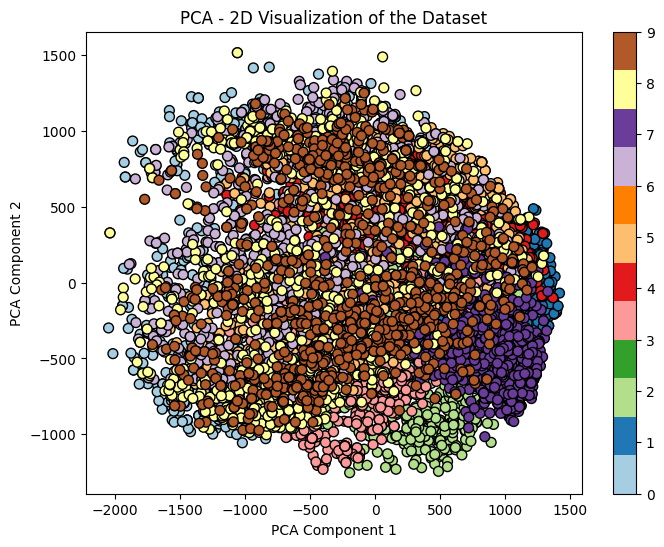

In [4]:
from sklearn.decomposition import PCA
import numpy as np
import kagglehub
import os
import matplotlib.pyplot as plt
from PIL import Image

def load_dataset():
    path = kagglehub.dataset_download("karnikakapoor/digits")
    dataset_path = os.path.join(path, "digits updated/digits updated")
    return dataset_path

def preprocess_images(dataset_path, img_size=(28, 28)):
    x = []
    y = []

    # Filtra solo le cartelle valide
    digit_folders = sorted([f for f in os.listdir(dataset_path) if f.isdigit() and os.path.isdir(os.path.join(dataset_path, f))])

    for digit in digit_folders:
        digit_path = os.path.join(dataset_path, digit)

        # Filtra solo immagini valide
        images = [img for img in os.listdir(digit_path) if not img.startswith('.') and img.lower().endswith(('.png', '.jpg', '.jpeg'))]

        for img_name in images:
            img_path = os.path.join(digit_path, img_name)
            img = Image.open(img_path).convert("L")  # Converti in scala di grigi
            img = img.resize(img_size)
            img_array = np.array(img).flatten()
            x.append(img_array)
            y.append(int(digit))  # Il nome della cartella rappresenta la cifra

    x = np.array(x)
    y = np.array(y)
    return x, y

def plot_2d_pca(x, y, num_samples=1000):
    # Seleziona un sottoinsieme casuale se il dataset è troppo grande
    if len(x) > num_samples:
        indices = np.random.choice(len(x), num_samples, replace=False)
        x_subset = x[indices]
        y_subset = y[indices]
    else:
        x_subset = x
        y_subset = y

    # Applica PCA per ridurre a 2 dimensioni
    pca = PCA(n_components=2)
    x_pca = pca.fit_transform(x_subset)

    # Scatter plot
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y_subset, cmap=plt.cm.Paired, edgecolors='k', s=50)

    # Aggiungi titoli e colorbar
    plt.title('PCA - 2D Visualization of the Dataset')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.colorbar(scatter)

    plt.show()

# Esegui il codice
dataset_path = load_dataset()
x, y = preprocess_images(dataset_path)
plot_2d_pca(x, y, num_samples=x.shape[0])

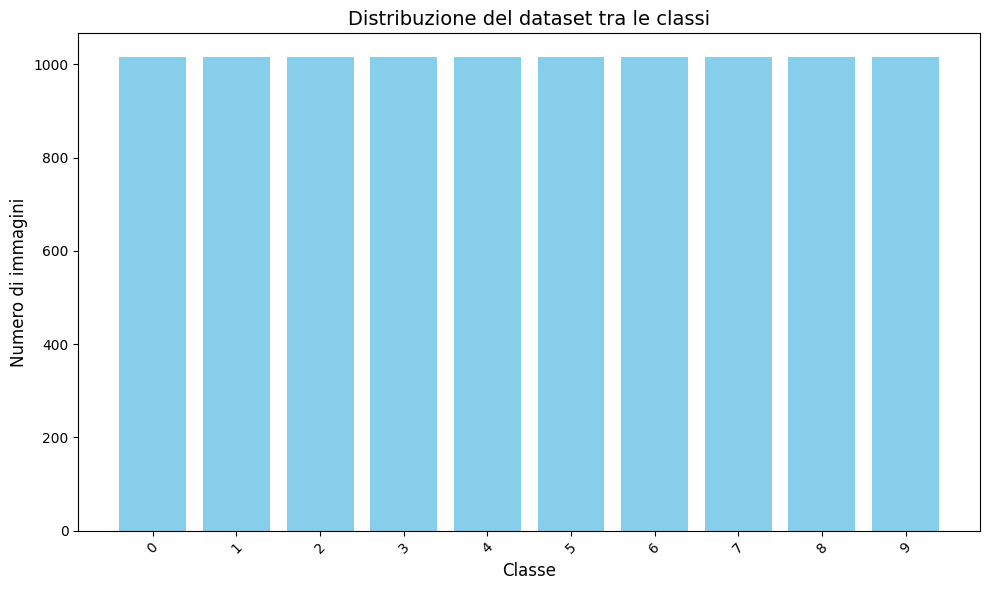

In [7]:
import matplotlib.pyplot as plt
import os

def plot_class_balance(dataset_path):
    class_counts = {}

    # Filtra solo cartelle numeriche (evita file come .DS_Store)
    digit_folders = sorted([f for f in os.listdir(dataset_path) if f.isdigit() and os.path.isdir(os.path.join(dataset_path, f))])

    for digit in digit_folders:
        digit_path = os.path.join(dataset_path, digit)
        num_images = len([img for img in os.listdir(digit_path) if not img.startswith('.')])
        class_counts[digit] = num_images

    # Prepara i dati per il grafico
    digits = list(class_counts.keys())
    counts = list(class_counts.values())

    plt.figure(figsize=(10, 6))
    plt.bar(digits, counts, color='skyblue')
    plt.xlabel('Classe', fontsize=12)
    plt.ylabel('Numero di immagini', fontsize=12)
    plt.title('Distribuzione del dataset tra le classi', fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Chiama la funzione con il dataset corretto
plot_class_balance(dataset_path)